In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
from sklearn.cluster import KMeans

startRampPath = 'data/BLM/start_ramp'

In [3]:
def getRowWithBlmMax(blmData):
    """
    Parameters
        blmData : DataFrame -- DataFrame loaded from the BLM data file, without timestamp column
    Returns
        DataFrame with row with the max BLM value in the provided data
    """
    maxes = blmData.max(axis=1)  # row index -> max for that row
    maxOverallIdx = maxes.idxmax() # row index where max overall in blmData can be found
    
    return blmData.loc[maxOverallIdx] # row containing max overall

In [4]:
files = sorted(os.listdir(startRampPath))
files = [file for file in files if file.endswith('.txt')] # keep only text files - filter out files such as desktop.ini

# To confirm that fills have been loaded in chronological order
files

['Fill_6925_start_ramp.txt',
 'Fill_6927_start_ramp.txt',
 'Fill_6928_start_ramp.txt',
 'Fill_6929_start_ramp.txt',
 'Fill_6931_start_ramp.txt',
 'Fill_6938_start_ramp.txt',
 'Fill_6939_start_ramp.txt',
 'Fill_6940_start_ramp.txt',
 'Fill_6942_start_ramp.txt',
 'Fill_6944_start_ramp.txt',
 'Fill_6946_start_ramp.txt',
 'Fill_6952_start_ramp.txt',
 'Fill_6953_start_ramp.txt',
 'Fill_6956_start_ramp.txt',
 'Fill_6957_start_ramp.txt',
 'Fill_6960_start_ramp.txt',
 'Fill_6961_start_ramp.txt',
 'Fill_6962_start_ramp.txt',
 'Fill_6963_start_ramp.txt',
 'Fill_6964_start_ramp.txt',
 'Fill_6966_start_ramp.txt',
 'Fill_6967_start_ramp.txt',
 'Fill_6972_start_ramp.txt',
 'Fill_6973_start_ramp.txt',
 'Fill_6974_start_ramp.txt',
 'Fill_6975_start_ramp.txt',
 'Fill_6976_start_ramp.txt',
 'Fill_6978_start_ramp.txt',
 'Fill_6979_start_ramp.txt',
 'Fill_6980_start_ramp.txt',
 'Fill_6981_start_ramp.txt',
 'Fill_6984_start_ramp.txt',
 'Fill_6988_start_ramp.txt',
 'Fill_6989_start_ramp.txt',
 'Fill_6990_st

In [58]:
rowsToCluster = pd.DataFrame()
maxFiles = -1 # -1 to process all files

for i, file in enumerate(files):
    if i == maxFiles:
        break
    
    # load BLM data file as a DataFrame
    blmData = pd.read_csv(startRampPath + '/' + file, sep=' ', header=None)
    
    # Delete first column (contains timestamps)
    blmData = blmData.drop(columns=0)
    
    rowsToCluster = rowsToCluster.append(getRowWithBlmMax(blmData), ignore_index=True)

In [59]:
rowsToCluster

,1,2,3,4,5,6,7,8,9,10,...,3752,3753,3754,3755,3756,3757,3758,3759,3760,3761
0,0.000002,5.524000e-07,5.386000e-07,6.214000e-07,7.871000e-07,1.005000e-06,8.506000e-07,6.242000e-07,5.717000e-07,5.220000e-07,...,4.971000e-07,6.877000e-07,7.844000e-07,8.534000e-07,7.816000e-07,8.092000e-07,6.435000e-07,4.778000e-07,0.000004,5.579000e-07
1,0.000002,4.723000e-07,4.391000e-07,3.452000e-07,5.441000e-07,6.187000e-07,6.380000e-07,5.054000e-07,4.612000e-07,4.668000e-07,...,3.977000e-07,5.247000e-07,5.717000e-07,6.021000e-07,6.187000e-07,5.662000e-07,4.612000e-07,4.060000e-07,0.000004,5.358000e-07
2,0.000002,4.391000e-07,4.088000e-07,4.308000e-07,5.109000e-07,7.153000e-07,5.910000e-07,4.778000e-07,4.226000e-07,4.032000e-07,...,3.756000e-07,5.275000e-07,5.441000e-07,5.386000e-07,5.468000e-07,5.109000e-07,4.419000e-07,3.480000e-07,0.000004,5.027000e-07
3,0.000002,4.032000e-07,3.977000e-07,3.894000e-07,4.778000e-07,5.662000e-07,5.579000e-07,4.612000e-07,4.253000e-07,4.143000e-07,...,3.259000e-07,4.778000e-07,5.054000e-07,5.413000e-07,4.944000e-07,4.612000e-07,4.226000e-07,3.618000e-07,0.000004,5.027000e-07
4,0.000002,3.590000e-07,3.508000e-07,3.480000e-07,3.949000e-07,4.695000e-07,4.364000e-07,3.811000e-07,3.535000e-07,3.646000e-07,...,3.038000e-07,4.088000e-07,4.253000e-07,4.364000e-07,3.949000e-07,3.563000e-07,3.673000e-07,3.204000e-07,0.000004,4.226000e-07
5,0.000002,3.452000e-07,3.452000e-07,3.231000e-07,3.508000e-07,4.447000e-07,4.226000e-07,3.646000e-07,3.287000e-07,3.342000e-07,...,3.010000e-07,3.867000e-07,4.281000e-07,4.170000e-07,3.287000e-07,4.253000e-07,4.005000e-07,3.342000e-07,0.000004,4.336000e-07
6,0.000002,3.369000e-07,3.508000e-07,3.176000e-07,3.535000e-07,5.689000e-07,4.170000e-07,3.314000e-07,3.148000e-07,3.425000e-07,...,2.651000e-07,3.756000e-07,3.480000e-07,3.894000e-07,3.508000e-07,3.452000e-07,3.342000e-07,3.066000e-07,0.000004,3.204000e-07
7,0.000002,4.557000e-07,4.336000e-07,4.502000e-07,5.275000e-07,5.883000e-07,6.021000e-07,4.888000e-07,4.723000e-07,4.447000e-07,...,3.590000e-07,4.971000e-07,5.689000e-07,5.717000e-07,5.165000e-07,4.999000e-07,4.474000e-07,3.977000e-07,0.000004,4.723000e-07
8,0.000002,3.701000e-07,3.397000e-07,3.369000e-07,3.480000e-07,4.668000e-07,4.364000e-07,3.618000e-07,3.314000e-07,3.397000e-07,...,2.872000e-07,4.226000e-07,3.867000e-07,3.922000e-07,3.784000e-07,3.590000e-07,3.701000e-07,3.176000e-07,0.000004,4.170000e-07
9,0.000002,4.557000e-07,4.474000e-07,4.226000e-07,5.275000e-07,6.297000e-07,6.048000e-07,4.888000e-07,4.391000e-07,4.198000e-07,...,3.646000e-07,4.778000e-07,5.275000e-07,5.634000e-07,5.386000e-07,5.247000e-07,4.529000e-07,3.728000e-07,0.000004,4.833000e-07


In [60]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(rowsToCluster)
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [61]:
blmLabels = np.genfromtxt('data/blm_labels.txt', dtype='str')
beam1BlmLabels = np.genfromtxt('data/beam1_blm_labels.txt', dtype='str')
beam2BlmLabels = np.genfromtxt('data/beam2_blm_labels.txt', dtype='str')
logicalBlmLabels = np.genfromtxt('data/logical_blm_labels.txt', dtype='str')

rowsToCluster.columns = blmLabels

# Extract out of rowsToCluster BLMs associated with beam 1, and BLMs associated with Beam 2
beam1BlmData = rowsToCluster.filter(items=beam1BlmLabels); 
beam2BlmData = rowsToCluster.filter(items=beam2BlmLabels);

beam1BlmData.columns = logicalBlmLabels  
beam2BlmData.columns = logicalBlmLabels

# merge BLM data associated with beam 1, and BLM data associated with beam 2, under the same logical BLM labels
mergedBlmData = pd.concat([beam1BlmData, beam2BlmData], keys=['B1', 'B2'])

In [62]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(mergedBlmData)
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0
 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0
 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 0 0 0 1]


<IPython.core.display.Javascript object>


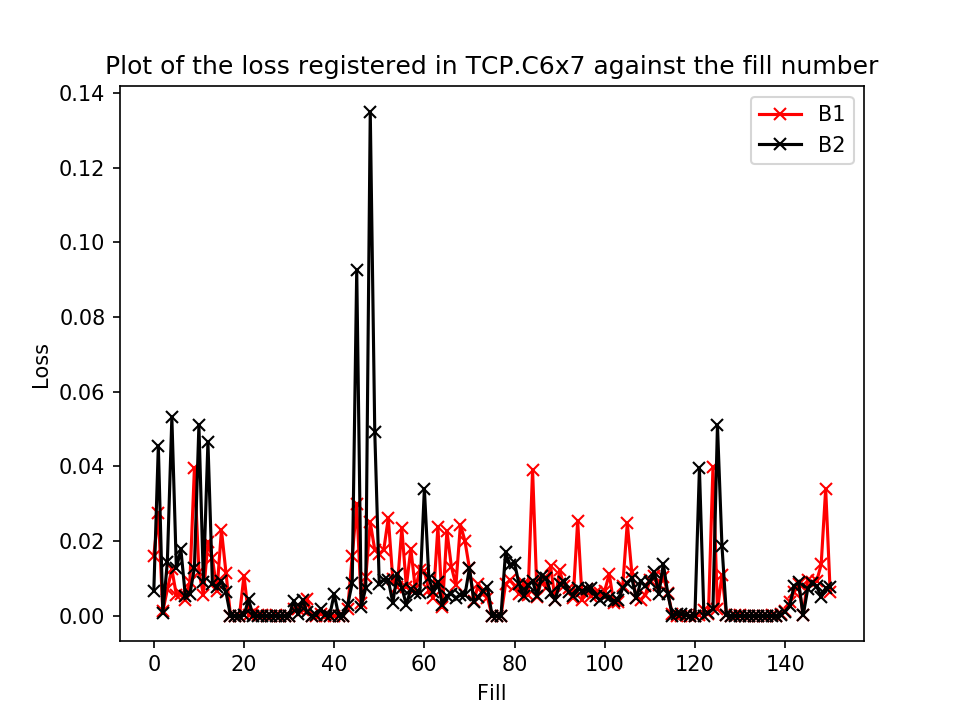

Text(0, 0.5, 'Loss')

In [63]:
# Data
df = pd.DataFrame({
    'B1': mergedBlmData.loc['B1']['TCP.C6x7'],
    'B2': mergedBlmData.loc['B2']['TCP.C6x7']
})
 
# multiple line plot
plt.figure()
plt.plot('B1', data=df, marker='x', color='red')
plt.plot('B2', data=df, marker='x', color='black')
plt.legend()
plt.title('Plot of the loss registered in TCP.C6x7 against the fill number')
plt.xlabel('Fill')
plt.ylabel('Loss')


<IPython.core.display.Javascript object>


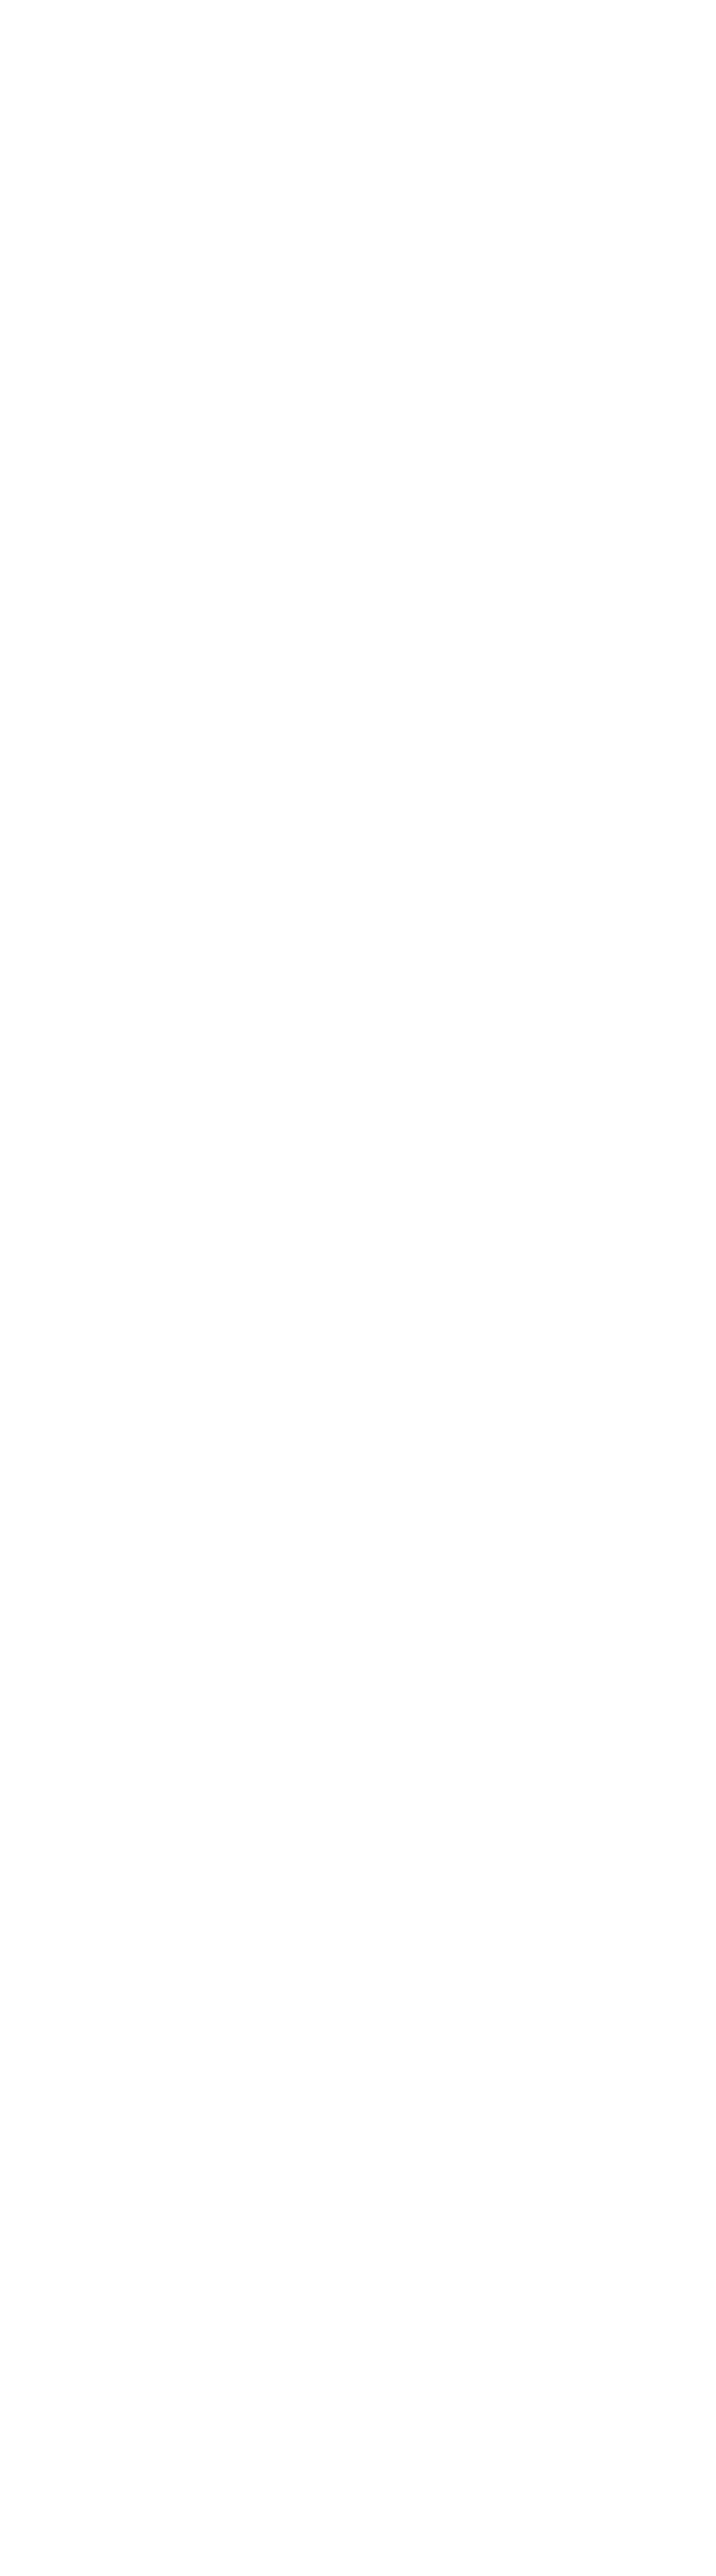

ValueError: If using all scalar values, you must pass an index

In [64]:
plt.figure(figsize=(10, 36))
ncols = 3;
nrows = math.ceil(mergedBlmData.shape[1] / ncols)
i = 1;

for column in mergedBlmData:
    # Data
    df = pd.DataFrame({
        'B1': mergedBlmData.loc['B1'][column],
        'B2': mergedBlmData.loc['B2'][column]
    })
 
    plt.subplot(nrows, ncols, i)
    plt.yscale('log')
    plt.plot('B1', data=df, marker='x', color='red')
    plt.plot('B2', data=df, marker='x', color='black')
    plt.title(column)

    
    i = i + 1

plt.tight_layout()

In [65]:
#To get Euclidean distance between the BLM vectors for beam 1 and beam 2
from scipy.spatial.distance import cdist
from scipy.spatial.distance import euclidean

distance = cdist(mergedBlmData.loc['B1'].values, mergedBlmData.loc['B2'].values, metric='euclidean').diagonal()
#getting diagonal to get the euclidean distance of pairs of vectors we care about (i.e. corresponding rows)
#eg. euclidean distance between row 0 of B1 values, row 0 of B2 values; euclidean distance between row 1 of B1 values,
#row 1 of B2 values, and so on.

#to confirm values are correct:
print(distance)
print(euclidean(mergedBlmData.loc['B1'].iloc[0], mergedBlmData.loc['B2'].iloc[0]))
print(euclidean(mergedBlmData.loc['B1'].iloc[1], mergedBlmData.loc['B2'].iloc[1]))
print(euclidean(mergedBlmData.loc['B1'].iloc[2], mergedBlmData.loc['B2'].iloc[2]))


[1.21875547e-02 2.71267123e-02 1.66996975e-03 1.08215555e-02
 6.33592254e-02 1.44132048e-02 1.69659676e-02 6.57658684e-03
 4.50394522e-03 3.62853095e-02 5.56116141e-02 1.80539156e-02
 3.88557119e-02 9.69606025e-03 9.70839468e-03 2.05050242e-02
 7.43863676e-03 1.11548201e-04 4.84952129e-05 1.27341246e-05
 1.42518774e-02 6.43027833e-03 1.68188336e-03 1.02618038e-04
 3.76627359e-05 9.39950095e-04 2.85845725e-05 1.23969313e-04
 5.55405131e-05 1.72709762e-04 1.18485145e-04 3.08437747e-03
 1.56398965e-03 6.32531073e-02 5.87791660e-03 1.96854430e-04
 8.93743524e-05 1.95778245e-03 8.84102022e-05 2.46461940e-06
 1.51978135e-02 2.59684737e-06 2.93196879e-05 2.46822809e-03
 9.51558561e-03 8.90635917e-02 1.94988529e-03 1.45700994e-02
 1.54026969e-01 4.62520321e-02 1.16459443e-02 2.07680826e-02
 2.70378792e-02 1.68364185e-02 4.03618062e-02 2.07841490e-02
 6.44957859e-03 1.39775643e-02 1.16564533e-02 1.33298830e-02
 3.24991311e-02 2.22125276e-02 4.27118555e-02 1.92147408e-02
 1.49677730e-02 2.329649

<IPython.core.display.Javascript object>


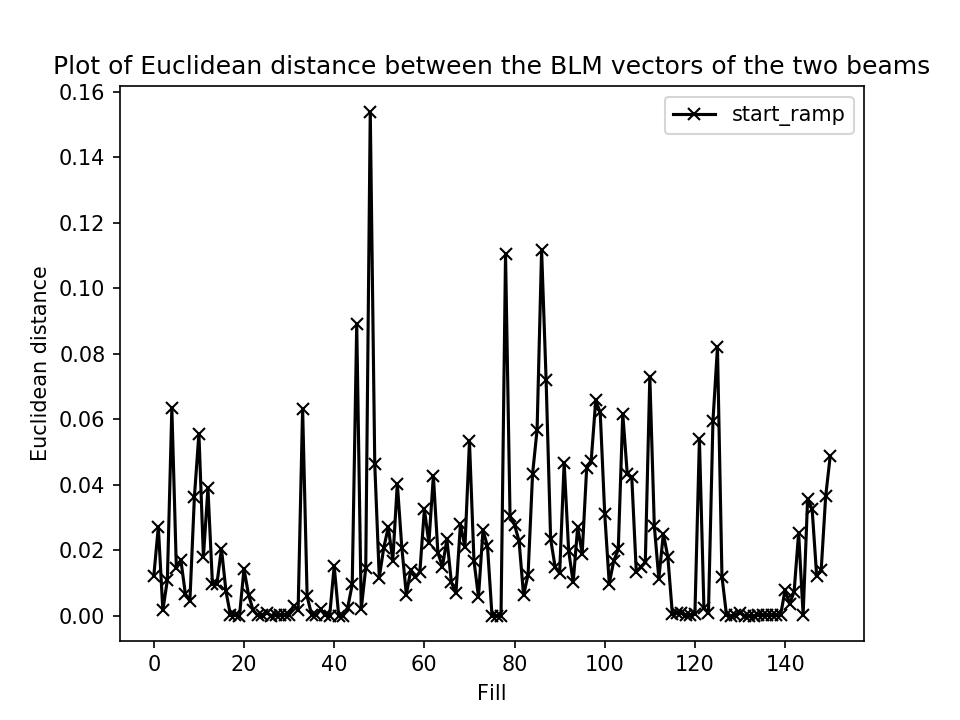

Text(0, 0.5, 'Euclidean distance')

In [66]:
# To plot Euclidean between the vectors (TCP, TCSG, ...) for beam 1 and beam 2
# Data
df = pd.DataFrame({
    'start_ramp': distance
})
 
# multiple line plot
plt.figure()
plt.plot('start_ramp', data=df, marker='x', color='black')
plt.legend()
plt.title('Plot of Euclidean distance between the BLM vectors of the two beams')
plt.xlabel('Fill')
plt.ylabel('Euclidean distance')